<a href="https://colab.research.google.com/github/clau17be/Predict-Price-Insurances/blob/main/Ajuste_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mi_archivo_train.csv to mi_archivo_train.csv


In [18]:
import pandas as pd
df = pd.read_csv('mi_archivo_train.csv')
df.head()
#print(df.shape)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Marital Status_Married,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Occupation_Employed,Location_Urban,Policy Type_Premium,Customer Feedback_Average,Smoking Status_Yes,Exercise Frequency_Weekly,Property Type_Apartment
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,48.0,127237.0,2.0,5.769783,1.0,11.0,398.0,5.0,111.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44.0,52447.0,2.0,20.473718,1.0,9.0,635.0,3.0,64.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,18.0,6076.0,2.0,7.442964,1.0,12.0,584.0,5.0,849.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


<Axes: xlabel='Premium Amount', ylabel='Count'>

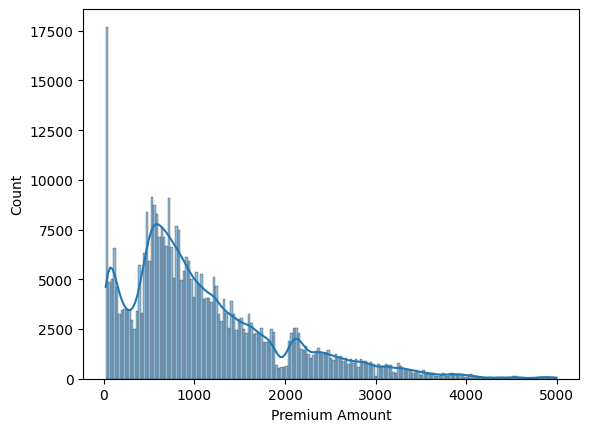

In [5]:
import seaborn as sns
sns.histplot(df['Premium Amount'], kde=True)

In [ ]:
# Calcular percentiles
low_percentile = df['Premium Amount'].quantile(0.05)
high_percentile = df['Premium Amount'].quantile(0.95)

# Filtrar: quedarse solo con el 5% inferior y el 5% superior
df_extremos = df[
    (df['Premium Amount'] <= low_percentile) |
    (df['Premium Amount'] >= high_percentile)
]

In [19]:
# Filtrar: quedarse solo con el 5% inferior y el 5% superior
df_extremos = df[(df['Premium Amount'] >= 500) & (df['Premium Amount'] <= 3500)]

<Axes: xlabel='Premium Amount', ylabel='Count'>

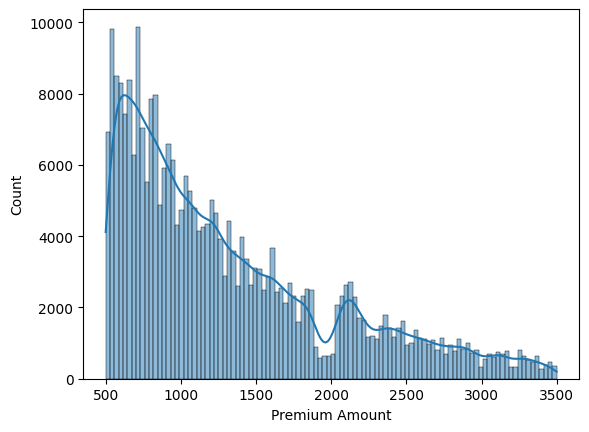

In [7]:
import seaborn as sns
sns.histplot(df_extremos['Premium Amount'], kde=True)

<Axes: ylabel='Premium Amount'>

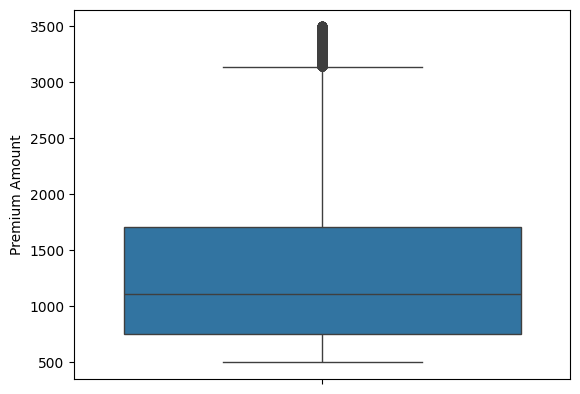

In [8]:
sns.boxplot(df_extremos['Premium Amount'])

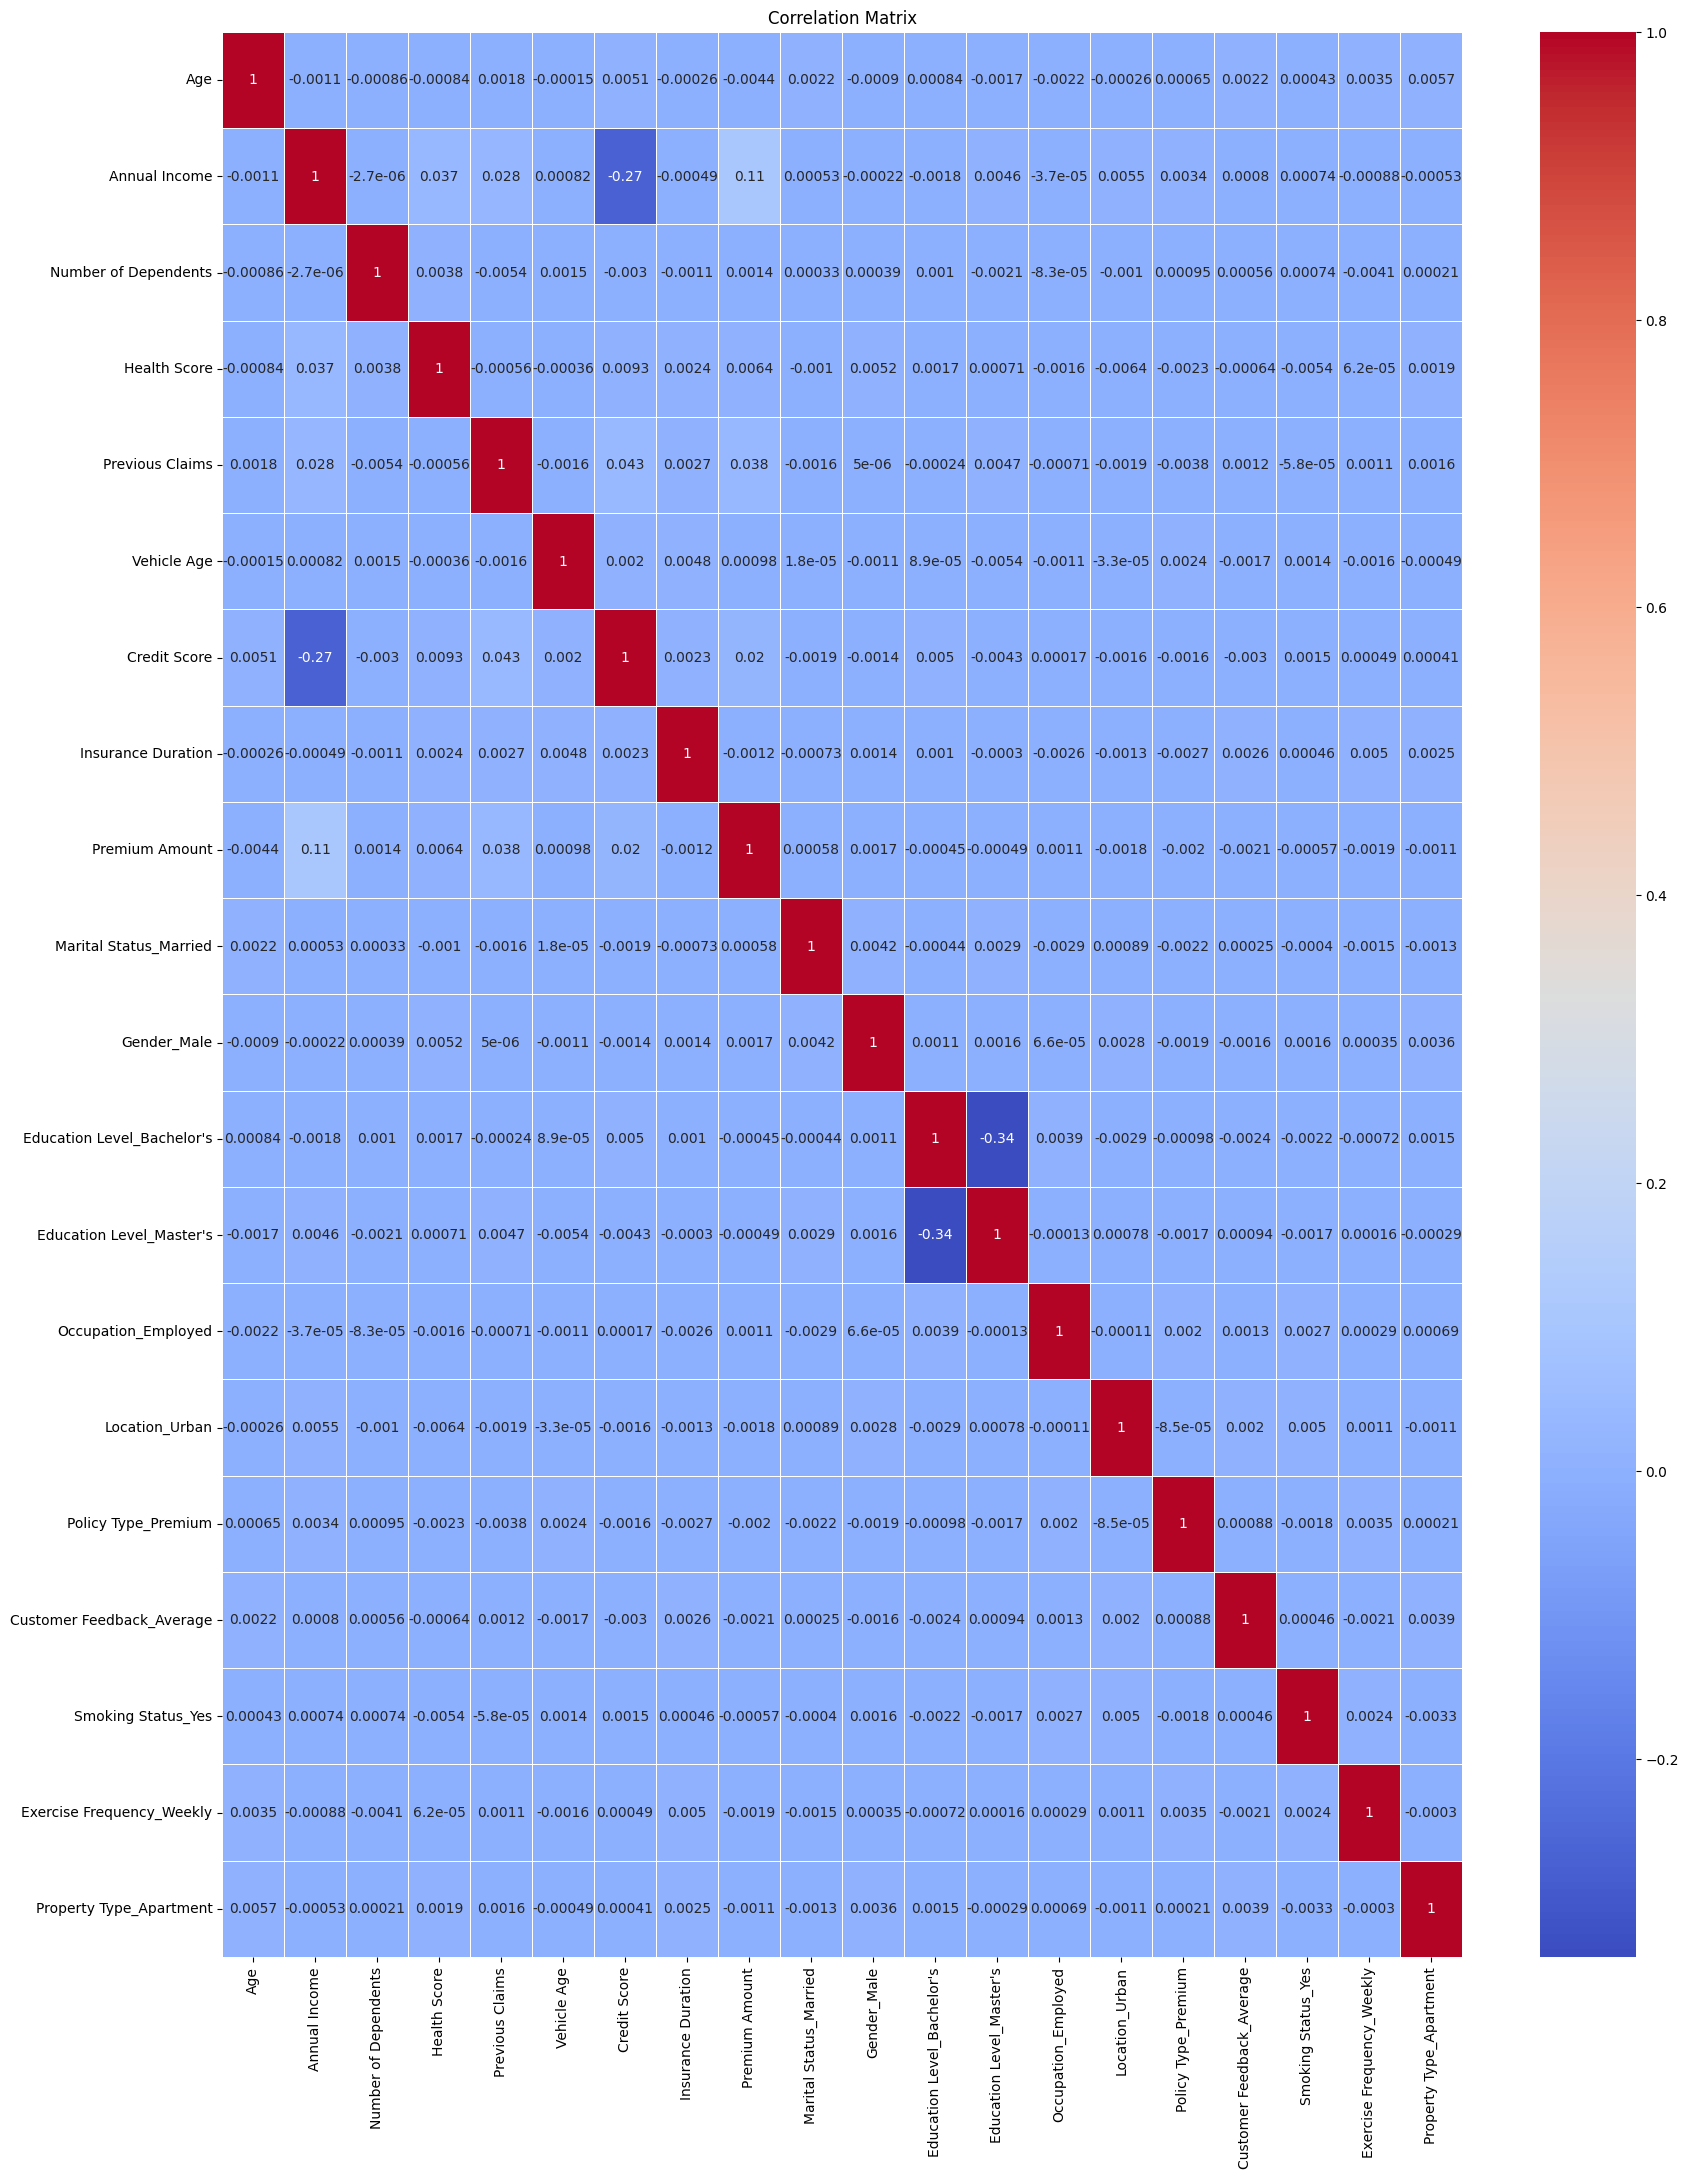

In [ ]:
# Compute correlation matrix
import matplotlib.pyplot as plt
corr_matrix = df_extremos.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Red positive correlation As one variable increases, the other variable also increases.
# Blue negative correlation As one variable increases, the other variable decreases.
# Zero correlation (white or near-white): There is no significant relationship between the two variables.
# 0 to 0.3: Weak or no correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.7 to 1.0: Strong positive correlation.
# -0.3 to -0.7: Moderate negative correlation.
# -0.7 to -1.0: Strong negative correlation.

# If two features have a high positive correlation, you might consider removing one of them to avoid
# multicollinearity (i.e., when two features are too similar, which can lead to problems in some
# machine learning models).

In [ ]:
corr_matrix = df_extremos.corr(numeric_only=True)
corr_matrix["Premium Amount"].sort_values(ascending=False)

,Premium Amount
Premium Amount,1.000000
Annual Income,0.110113
Previous Claims,0.037601
Credit Score,0.019925
Health Score,0.006364
Gender_Male,0.001682
Number of Dependents,0.001415
Occupation_Employed,0.001087
Vehicle Age,0.000977
Marital Status_Married,0.000582


In [20]:
df = df_extremos.drop(columns=["Marital Status_Married","Vehicle Age","Customer Feedback_Average","Education Level_Master's"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285530 entries, 0 to 384002
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         285530 non-null  float64
 1   Annual Income               285530 non-null  float64
 2   Number of Dependents        285530 non-null  float64
 3   Health Score                285530 non-null  float64
 4   Previous Claims             285530 non-null  float64
 5   Credit Score                285530 non-null  float64
 6   Insurance Duration          285530 non-null  float64
 7   Premium Amount              285530 non-null  float64
 8   Gender_Male                 285530 non-null  float64
 9   Education Level_Bachelor's  285530 non-null  float64
 10  Occupation_Employed         285530 non-null  float64
 11  Location_Urban              285530 non-null  float64
 12  Policy Type_Premium         285530 non-null  float64
 13  Smoking Status_Yes 

In [21]:
# Define your features (X) and target variable (y)
X = df.drop('Premium Amount', axis=1)  # All columns except 'target'
y = df['Premium Amount']  # The target column

In [22]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, then transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 6. Hacer predicciones sobre el test
y_pred = lr_model.predict(X_test)

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(32,), max_iter=200, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: xlabel='Premium Amount', ylabel='Count'>

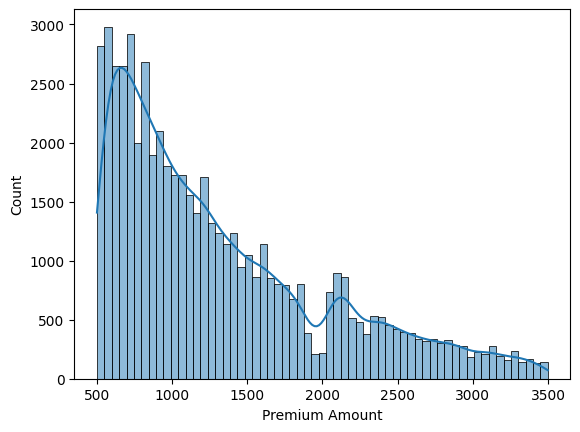

In [25]:
import seaborn as sns
sns.histplot(y_test, kde=True)

<Axes: ylabel='Count'>

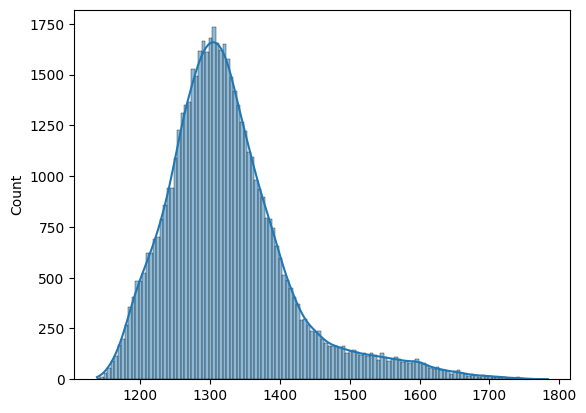

In [26]:
import seaborn as sns
sns.histplot(y_pred, kde=True)

In [27]:
# 8. Evaluación y comparación
print("📊 Model Comparison (Validation Set)\n")

print("🔹 Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

print("\n🔹 Neural Network (MLPRegressor)")
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("R²:", r2_score(y_test, y_pred_nn))

📊 Model Comparison (Validation Set)

🔹 Linear Regression
MSE: 500174.1665588951
R²: 0.01626148959327356

🔹 Neural Network (MLPRegressor)
MSE: 470031.2121464305
R²: 0.07554640883846653


In [ ]:
# Evaluación Regresión Lineal
print("🔹 Linear Regression Performance:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.2f}")

# Evaluación Red Neuronal
print("\n🔹 Neural Network (MLPRegressor) Performance:")
print(f"R²: {r2_score(y_test, y_pred_nn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_nn):,.2f}")


🔹 Linear Regression Performance:
R²: 0.0163
MSE: 500,174.17

🔹 Neural Network (MLPRegressor) Performance:
R²: 0.0763
MSE: 469,650.55
